# TDE Exposure Time Redshift Plots

This jupyter notebook contains python code for the production of:
- Plots of TDE objection's range of exposure times versus their redshift

This module takes in:

1) 'Full New TDE Catalog (Published).tsv'

2) 'priority_tde_indicies.txt' from the 'PriorityTDEFilter.py' module

and generates redshift vs exposure time range plots of each set of observations made on each TDE Target.

The output file is 'tde_exp_times_vs_redshift.pdf'

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Read in TDE data
tde_file_name = 'Full New TDE Catalog (Published).tsv'

tde_cat = pd.read_table(tde_file_name)
tde_cat.head(60)

,Name,Disc Date,Host Name,Host RA,Host Dec,z,mmax,Reference,Comment,"All XMM Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec])",...,XMM Min dt,XMM # dt < 3000,XMM # dt < 100,Chandra Min dt,Chandra # dt < 3000,Chandra # dt < 100,Swift Min dt,Swift # dt < 3000,swift # dt < 100,swift # dt > 100
0,2MASX J01190869-3411305,2010/07/01,GSN 069,01:19:08,-34:11:30,0.018000,NaN,https://arxiv.org/abs/1909.04693,NaN,"10: 0657820101 (2010-12-02, 14913.0), 07409601...",...,154.0,2.0,NaN,NaN,NaN,NaN,57.0,16.0,16.0,0
1,2XMM J123103.2+110648,2003/07/13,SDSS J123103.24+110648.6,12:31:03,+11:06:48.64,0.118710,NaN,https://academic.oup.com/mnras/article/468/1/7...,NaN,"5: 0145800101 (2003-07-13, 107002.0), 03066301...",...,0.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2XMMi J184725.1-631724,2006/09/01,IC 4765-f01-1504,18:47:25,-63:17:25,0.035300,NaN,https://iopscience.iop.org/article/10.1088/000...,NaN,"3: 0405550401 (2006-09-06, 28262.0), 069461010...",...,5.0,3.0,1.0,2401.0,1.0,NaN,1636.0,5.0,NaN,5
3,3XMM J150052.0+015452,2005/07/23,SDSS J150052.07+015453.8,15:00:52,+01:54:53.8,0.145000,NaN,"https://arxiv.org/pdf/1702.00792.pdf, https://...",NaN,"9: 0302460101 (2005-07-23, 36708.0), 055468020...",...,0.0,5.0,1.0,1048.0,9.0,NaN,2366.0,15.0,NaN,15
4,3XMM J152130.7+074916,2000/08/23,SDSS J152130.72+074916.5,15:21:31,+07:49:16.52,0.179010,NaN,https://iopscience.iop.org/article/10.3847/153...,likely X-ray TDE (Auchettl),"3: 0109930101 (2000-08-22, 55413.0), 010993020...",...,0.0,1.0,1.0,NaN,NaN,NaN,1844.0,1.0,NaN,1
5,3XMM J215022.4-055108,2005/05/01,6dFGS gJ215022.2-055059,21:50:22,-5:51:08,0.055000,NaN,https://arxiv.org/pdf/1806.05692.pdf,NaN,"4: 0823360101 (2018-05-24, 60000.0), 060359010...",...,369.0,3.0,NaN,515.0,1.0,NaN,NaN,NaN,NaN,0
6,ASASSN-14ae,2014/01/25,SDSS J110840.11+340552.2,11:08:40,+34:05:52.23,0.043671,15.60,https://iopscience.iop.org/article/10.3847/153...,veiled (Auchettl),"3: 0694651001 (2014-05-15, 23499.0), 069465110...",...,110.0,3.0,NaN,1757.0,1.0,NaN,2.0,24.0,24.0,0
7,ASASSN-14li,2014/11/22,SDSS J124815.23+174626.4,12:48:15,+17:46:26.44,0.020600,15.80,https://ui.adsabs.harvard.edu/abs/2014ATel.677...,NaN,"13: 0694651201 (2014-12-06, 23000.0), 06946514...",...,14.0,13.0,3.0,16.0,7.0,2.0,8.0,114.0,114.0,0
8,ASASSN-15lh,2015/06/14,APMUKS (BJ) B215839.70-615403.9,22:02:15,-61:39:35,0.232600,15.24,https://iopscience.iop.org/article/10.3847/153...,veiled (Auchettl),"2: 0770581201 (2015-11-18, 13000.0), 080228010...",...,157.0,2.0,NaN,151.0,4.0,NaN,10.0,128.0,128.0,0
9,ASASSN-15oi,2015/08/14,2MASX J20390918-3045201,20:39:09,-30:45:20,0.048400,14.44,https://ui.adsabs.harvard.edu/abs/2015ATel.791...,NaN,"2: 0722160501 (2015-10-29, 17200.0), 072216070...",...,76.0,2.0,1.0,NaN,NaN,NaN,11.0,49.0,49.0,0


In [3]:
tde_cat.z.describe()

count    114.000000
mean       0.158196
std        0.255079
min        0.000271
25%        0.036600
50%        0.107550
75%        0.183000
max        2.230000
Name: z, dtype: float64

In [4]:
tde_cat.loc[tde_cat.z <= 0.15].describe()

,z,mmax,"XMM Filtered TDE Data (total #ObsIDs with TDE, unique date, >1000 [sec])","Chandra Filtered TDE Data (total #ObsIDs with TDE, unique date, >1000 [sec])","Swift Filtered TDE Data (total #ObsIDs with TDE, unique date, >1000 [sec])",XMM Min dt,XMM # dt < 3000,XMM # dt < 100,Chandra Min dt,Chandra # dt < 3000,Chandra # dt < 100,Swift Min dt,Swift # dt < 3000,swift # dt < 100,swift # dt > 100
count,79.000000,32.000000,33.000000,25.000000,41.000000,21.000000,21.000000,13.000000,15.000000,15.000000,5.000000,32.000000,32.000000,18.000000,79.000000
mean,0.067548,14.980313,2.757576,7.160000,16.512195,214.190476,3.285714,1.384615,775.333333,3.533333,1.400000,776.125000,18.218750,25.555556,1.556962
std,0.046147,2.764064,2.915801,22.425209,21.299204,382.966137,2.883450,0.767948,787.910226,3.833437,0.547723,1021.666026,25.575611,28.071803,8.439448
min,0.000271,11.210000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000
25%,0.022673,12.482500,1.000000,1.000000,2.000000,14.000000,2.000000,1.000000,70.000000,1.000000,1.000000,13.000000,2.750000,10.250000,0.000000
50%,0.063600,14.615000,2.000000,2.000000,10.000000,51.000000,2.000000,1.000000,761.000000,1.000000,1.000000,47.000000,10.500000,13.000000,0.000000
75%,0.108650,17.617500,3.000000,3.000000,18.000000,154.000000,3.000000,1.000000,1027.000000,5.000000,2.000000,1678.000000,16.250000,30.000000,0.000000
max,0.147000,20.110000,13.000000,114.000000,98.000000,1488.000000,13.000000,3.000000,2401.000000,13.000000,2.000000,2653.000000,114.000000,114.000000,73.000000


In [5]:
tde_cat.loc[tde_cat.z <= 0.15].z.count() / tde_cat.z.count()

0.6929824561403509

In [6]:
# drop TDEs that may be other phenomena or that are not relevent

obj1 = {'name':'IGR J17361-4441', 'index':31}  # possible LMXB
obj2 = {'name':'NGC 247', 'index':53}  # possible LMXB
obj3 = {'name':'ASASSN-15oi', 'index':11} # inconclusive results
obj4 = {'name':'MAXI J1807+132', 'index':52}  # possible LMXB

# print(obj1.get('index'))

drop_dict = {0:obj1, 1:obj2, 2:obj3, 3:obj4}

# print([drop_dict[i].get('index')-2 for i in range(len(drop_dict))])

drop_indices = [drop_dict[i].get('index')-2 for i in range(len(drop_dict))]

# Check that dropped objects above are shown below
tde_cat.iloc[drop_indices]

,Name,Disc Date,Host Name,Host RA,Host Dec,z,mmax,Reference,Comment,"All XMM Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec])",...,XMM Min dt,XMM # dt < 3000,XMM # dt < 100,Chandra Min dt,Chandra # dt < 3000,Chandra # dt < 100,Swift Min dt,Swift # dt < 3000,swift # dt < 100,swift # dt > 100
29,IGR J17361-4441,2003/03/22,NGC 6388,17:36:17,-44:44:08,0.000271,NaN,https://iopscience.iop.org/article/10.3847/153...,"likely X-ray TDE (Auchettl), planetary disrupt...","2: 0146420101 (2003-03-21, 48918.0), 067938030...",...,NaN,NaN,NaN,761.0,1.0,NaN,2607.0,1.0,NaN,1
51,NGC 247,2014/07/01,NGC 247,00:47:09,-20:45:37,0.000531,NaN,https://iopscience.iop.org/article/10.3847/153...,"likely X-ray TDE (Auchettl), outburst of LMXB?","11: 0601010101 (2009-12-27, 34816.0), 07281901...",...,0.0,9.0,1.0,134.0,1.0,NaN,104.0,73.0,NaN,73
9,ASASSN-15oi,2015/08/14,2MASX J20390918-3045201,20:39:09,-30:45:20,0.048400,14.44,https://ui.adsabs.harvard.edu/abs/2015ATel.791...,NaN,"2: 0722160501 (2015-10-29, 17200.0), 072216070...",...,76.0,2.0,1.0,NaN,NaN,NaN,11.0,49.0,49.0,0
50,MAXI J1807+132,2017/03/15,NaN,NaN,NaN,NaN,17.20,"https://arxiv.org/pdf/2011.10448.pdf, https://...",NaN,"2: 0744250301 (2017-03-29, 19000.0), 074425040...",...,14.0,2.0,2.0,NaN,NaN,NaN,12.0,17.0,17.0,0


In [7]:
# tde_cat = tde_cat.drop(labels=drop_indices, axis=0)

tde_cat.iloc[drop_indices]

,Name,Disc Date,Host Name,Host RA,Host Dec,z,mmax,Reference,Comment,"All XMM Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec])",...,XMM Min dt,XMM # dt < 3000,XMM # dt < 100,Chandra Min dt,Chandra # dt < 3000,Chandra # dt < 100,Swift Min dt,Swift # dt < 3000,swift # dt < 100,swift # dt > 100
29,IGR J17361-4441,2003/03/22,NGC 6388,17:36:17,-44:44:08,0.000271,NaN,https://iopscience.iop.org/article/10.3847/153...,"likely X-ray TDE (Auchettl), planetary disrupt...","2: 0146420101 (2003-03-21, 48918.0), 067938030...",...,NaN,NaN,NaN,761.0,1.0,NaN,2607.0,1.0,NaN,1
51,NGC 247,2014/07/01,NGC 247,00:47:09,-20:45:37,0.000531,NaN,https://iopscience.iop.org/article/10.3847/153...,"likely X-ray TDE (Auchettl), outburst of LMXB?","11: 0601010101 (2009-12-27, 34816.0), 07281901...",...,0.0,9.0,1.0,134.0,1.0,NaN,104.0,73.0,NaN,73
9,ASASSN-15oi,2015/08/14,2MASX J20390918-3045201,20:39:09,-30:45:20,0.048400,14.44,https://ui.adsabs.harvard.edu/abs/2015ATel.791...,NaN,"2: 0722160501 (2015-10-29, 17200.0), 072216070...",...,76.0,2.0,1.0,NaN,NaN,NaN,11.0,49.0,49.0,0
50,MAXI J1807+132,2017/03/15,NaN,NaN,NaN,NaN,17.20,"https://arxiv.org/pdf/2011.10448.pdf, https://...",NaN,"2: 0744250301 (2017-03-29, 19000.0), 074425040...",...,14.0,2.0,2.0,NaN,NaN,NaN,12.0,17.0,17.0,0


In [8]:
# Get priority tde indicies from 'priority_tde_indicies.txt'
with open('priority_tde_indicies.txt', 'r') as rfile:
    for line in rfile:
        priority_tdes = [int(num) for num in line.strip('][').split(', ')]

# NOTE: priority indices are from 'Priority TDE Filter.ipynb'
# priority_tdes = [1, 2, 3, 7, 9, 12, 14, 16, 19, 21, 23, 25, 51, 80, 81, 82, 101, 102, 107, 111, 112
#                  , 4, 50, 78, 114, 117
#                  , 0, 5, 6, 8, 11, 22, 24, 52, 55, 115
#                  , 29, 30, 31, 64, 83, 110]
print(priority_tdes, '\n',len(priority_tdes))

# Update indicies to exclude dropped data
for index in drop_indices:
    if index in priority_tdes:
        priority_tdes.remove(index)

print(priority_tdes, '\n',len(priority_tdes))

[7, 14, 19, 21, 50, 101, 107, 110, 1, 2, 3, 9, 12, 16, 23, 25, 51, 78, 80, 81, 82, 102, 109, 4, 112, 115, 0, 5, 6, 8, 11, 22, 24, 52, 55, 113] 
 36
[7, 14, 19, 21, 101, 107, 110, 1, 2, 3, 12, 16, 23, 25, 78, 80, 81, 82, 102, 109, 4, 112, 115, 0, 5, 6, 8, 11, 22, 24, 52, 55, 113] 
 33


In [9]:
bin_width = 0.05

# tde_cat.hist(column= ['All XMM Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec])']
#              , by=None
#              , grid=False
#              , xlabelsize=None
#              , xrot=None
#              , ylabelsize=None
#              , yrot=None
#              , ax=None
#              , sharex=False
#              , sharey=False
#              , figsize=None
#              , layout=None
#              , bins=np.arange(0,2.5,bin_width)
#              , backend=None
#              , legend=False
#             )

xray_df = tde_cat[['All XMM Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec])'
                         , 'All Chandra Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec], detector)'
                        ]
                       ]

xray_df

,"All XMM Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec])","All Chandra Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec], detector)"
0,"10: 0657820101 (2010-12-02, 14913.0), 07409601...","1: 22096 (2019-02-14, 73570.0, ACIS-S ),"
1,"5: 0145800101 (2003-07-13, 107002.0), 03066301...","1: 17129 (2016-02-10, 40060.0, ACIS-S ),"
2,"3: 0405550401 (2006-09-06, 28262.0), 069461010...","1: 15637 (2013-03-29, 15070.0, ACIS-S ),"
3,"9: 0302460101 (2005-07-23, 36708.0), 055468020...","11: 9517 (2008-06-05, 100060.0, ACIS-S ), 5..."
4,"3: 0109930101 (2000-08-22, 55413.0), 010993020...","1: 900 (2000-04-03, 58030.0, ACIS-I ),"
...,...,...
111,"1: 0721830301 (2013-12-21, 8600.0),",NaN
112,"1: 0679381201 (2011-12-22, 14719.0),",NaN
113,"2: 0804860201 (2018-07-17, 34300.0), 080486030...",NaN
114,"5: 0763640201 (2016-09-08, 11600.0), 076364040...",NaN


In [10]:
xray_dat = pd.DataFrame(xray_df.to_numpy().flatten()).dropna()
xray_dat

,0
0,"10: 0657820101 (2010-12-02, 14913.0), 07409601..."
1,"1: 22096 (2019-02-14, 73570.0, ACIS-S ),"
2,"5: 0145800101 (2003-07-13, 107002.0), 03066301..."
3,"1: 17129 (2016-02-10, 40060.0, ACIS-S ),"
4,"3: 0405550401 (2006-09-06, 28262.0), 069461010..."
...,...
222,"1: 0721830301 (2013-12-21, 8600.0),"
224,"1: 0679381201 (2011-12-22, 14719.0),"
226,"2: 0804860201 (2018-07-17, 34300.0), 080486030..."
228,"5: 0763640201 (2016-09-08, 11600.0), 076364040..."


In [11]:
def get_exp_times(df):
    all_exp_times = []

    for item in df[0]:
        # print(item)

        item = item.split(':')[1]
        # print(item)

        items = item.split('),')
        # print(items)

        items = [x for x in items if x!='']
        # print(items)

        exp_times = []

        for i,element in enumerate(items):
            # print(element)
            exp_times.append( float(element.split(',')[1]) )

        # print(exp_times)

        # break

        all_exp_times += exp_times

        # print('\n')
        # print(all_exp_times)
        # print('\n')

    # print(len(all_exp_times), all_exp_times)
    # print(f'min exp time = {min(all_exp_times)}; max exp time = {max(all_exp_times)}')
    return all_exp_times

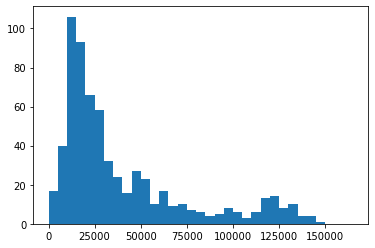

In [12]:
all_exp_times = get_exp_times(xray_dat)

bin_width = 5000

plt.hist(all_exp_times
         , bins=np.arange(0,170000,bin_width)
        )

plt.show()

In [13]:
fitted_df = tde_cat.iloc[[3,5,7]]
fitted_df

,Name,Disc Date,Host Name,Host RA,Host Dec,z,mmax,Reference,Comment,"All XMM Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec])",...,XMM Min dt,XMM # dt < 3000,XMM # dt < 100,Chandra Min dt,Chandra # dt < 3000,Chandra # dt < 100,Swift Min dt,Swift # dt < 3000,swift # dt < 100,swift # dt > 100
3,3XMM J150052.0+015452,2005/07/23,SDSS J150052.07+015453.8,15:00:52,+01:54:53.8,0.1450,NaN,"https://arxiv.org/pdf/1702.00792.pdf, https://...",NaN,"9: 0302460101 (2005-07-23, 36708.0), 055468020...",...,0.0,5.0,1.0,1048.0,9.0,NaN,2366.0,15.0,NaN,15
5,3XMM J215022.4-055108,2005/05/01,6dFGS gJ215022.2-055059,21:50:22,-5:51:08,0.0550,NaN,https://arxiv.org/pdf/1806.05692.pdf,NaN,"4: 0823360101 (2018-05-24, 60000.0), 060359010...",...,369.0,3.0,NaN,515.0,1.0,NaN,NaN,NaN,NaN,0
7,ASASSN-14li,2014/11/22,SDSS J124815.23+174626.4,12:48:15,+17:46:26.44,0.0206,15.8,https://ui.adsabs.harvard.edu/abs/2014ATel.677...,NaN,"13: 0694651201 (2014-12-06, 23000.0), 06946514...",...,14.0,13.0,3.0,16.0,7.0,2.0,8.0,114.0,114.0,0


In [14]:
fitted_xray_df = fitted_df[['All XMM Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec])'
                         , 'All Chandra Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec], detector)'
                        ]
                       ]
fitted_xray_dat = pd.DataFrame(fitted_xray_df.to_numpy().flatten()).dropna()
fitted_xray_dat

,0
0,"9: 0302460101 (2005-07-23, 36708.0), 055468020..."
1,"11: 9517 (2008-06-05, 100060.0, ACIS-S ), 5..."
2,"4: 0823360101 (2018-05-24, 60000.0), 060359010..."
3,"2: 17862 (2016-09-14, 78120.0, ACIS-S ), 679..."
4,"13: 0694651201 (2014-12-06, 23000.0), 06946514..."
5,"7: 17566 (2014-12-08, 35040.0, HRC-S ), 1756..."


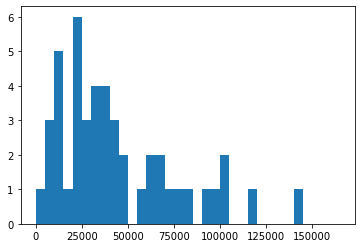

In [15]:
fitted_exp_times = get_exp_times(fitted_xray_dat)

bin_width = 5000

plt.hist(fitted_exp_times
         , bins=np.arange(0,170000,bin_width)
        )

plt.show()

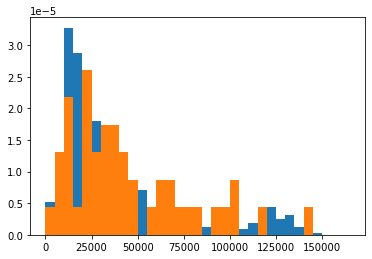

In [16]:
fig = plt.figure()

bin_width = 5000

plt.hist(all_exp_times
         , bins=np.arange(0,170000,bin_width)
         , density=True
        )

plt.hist(fitted_exp_times
         , bins=np.arange(0,170000,bin_width)
         , density=True
        )

plt.show()

In [17]:
stats.describe(all_exp_times)

DescribeResult(nobs=648, minmax=(2333.0, 165290.0), mean=39397.75617283951, variance=1273632843.7766235, skewness=1.4380999116725734, kurtosis=1.0508591331507269)

In [18]:
stats.describe(fitted_exp_times)

DescribeResult(nobs=46, minmax=(2378.0, 144900.0), mean=43888.36956521739, variance=1094079123.704831, skewness=1.119559227658908, kurtosis=0.6673037006351556)

In [19]:
sigma = np.sqrt(stats.describe(fitted_exp_times)[3])
print(sigma)

33076.866896742664


In [20]:
tde_cat

,Name,Disc Date,Host Name,Host RA,Host Dec,z,mmax,Reference,Comment,"All XMM Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec])",...,XMM Min dt,XMM # dt < 3000,XMM # dt < 100,Chandra Min dt,Chandra # dt < 3000,Chandra # dt < 100,Swift Min dt,Swift # dt < 3000,swift # dt < 100,swift # dt > 100
0,2MASX J01190869-3411305,2010/07/01,GSN 069,01:19:08,-34:11:30,0.01800,NaN,https://arxiv.org/abs/1909.04693,NaN,"10: 0657820101 (2010-12-02, 14913.0), 07409601...",...,154.0,2.0,NaN,NaN,NaN,NaN,57.0,16.0,16.0,0
1,2XMM J123103.2+110648,2003/07/13,SDSS J123103.24+110648.6,12:31:03,+11:06:48.64,0.11871,NaN,https://academic.oup.com/mnras/article/468/1/7...,NaN,"5: 0145800101 (2003-07-13, 107002.0), 03066301...",...,0.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2XMMi J184725.1-631724,2006/09/01,IC 4765-f01-1504,18:47:25,-63:17:25,0.03530,NaN,https://iopscience.iop.org/article/10.1088/000...,NaN,"3: 0405550401 (2006-09-06, 28262.0), 069461010...",...,5.0,3.0,1.0,2401.0,1.0,NaN,1636.0,5.0,NaN,5
3,3XMM J150052.0+015452,2005/07/23,SDSS J150052.07+015453.8,15:00:52,+01:54:53.8,0.14500,NaN,"https://arxiv.org/pdf/1702.00792.pdf, https://...",NaN,"9: 0302460101 (2005-07-23, 36708.0), 055468020...",...,0.0,5.0,1.0,1048.0,9.0,NaN,2366.0,15.0,NaN,15
4,3XMM J152130.7+074916,2000/08/23,SDSS J152130.72+074916.5,15:21:31,+07:49:16.52,0.17901,NaN,https://iopscience.iop.org/article/10.3847/153...,likely X-ray TDE (Auchettl),"3: 0109930101 (2000-08-22, 55413.0), 010993020...",...,0.0,1.0,1.0,NaN,NaN,NaN,1844.0,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,XMMSL1 J131952.3+225958,2005/07/15,NGC 5092,13:19:52,22:59:58,0.02300,NaN,https://ui.adsabs.harvard.edu/abs/2020ApJ...89...,NaN,"1: 0721830301 (2013-12-21, 8600.0),",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
112,XMMSL1 J063045.9-603110,2011/12/01,XMMSL1 J063045.9-603110,06:30:46,-60:31:10,0.01400,NaN,https://ui.adsabs.harvard.edu/abs/2016A%26A......,NaN,"1: 0679381201 (2011-12-22, 14719.0),",...,21.0,1.0,1.0,NaN,NaN,NaN,19.0,3.0,3.0,0
113,XMMSL2 J140446.9-251135,2018/02/15,2MASX 14044671-2511433,14:04:47,-25:11:35,0.04300,NaN,http://www.astronomerstelegram.org/?read=11394,NaN,"2: 0804860201 (2018-07-17, 34300.0), 080486030...",...,152.0,2.0,NaN,NaN,NaN,NaN,13.0,13.0,13.0,0
114,XMMSL2 J144605.0+685735,2006/08/22,"2MASX 14460522+6857311, LEDA 2725953",14:46:05,68:57:31,0.02900,NaN,http://colloquium.bao.ac.cn/httpdata/files/col...,NaN,"5: 0763640201 (2016-09-08, 11600.0), 076364040...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [21]:
priority_tdes_df = tde_cat.iloc[priority_tdes]
priority_tdes_df

priority_tdes_df.sort_values(by=['z'])

,Name,Disc Date,Host Name,Host RA,Host Dec,z,mmax,Reference,Comment,"All XMM Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec])",...,XMM Min dt,XMM # dt < 3000,XMM # dt < 100,Chandra Min dt,Chandra # dt < 3000,Chandra # dt < 100,Swift Min dt,Swift # dt < 3000,swift # dt < 100,swift # dt > 100
52,NGC 3599,2002/05/27,NGC 3599,11:15:27,+18:06:37.33,0.002699,NaN,https://www.cambridge.org/core/services/aop-ca...,possible X-ray TDE (Auchettl),"2: 0411980101 (2006-06-23, 6894.0), 0556090101...",...,1488.0,2.0,NaN,2070.0,1.0,NaN,1649.0,1.0,NaN,1
112,XMMSL1 J063045.9-603110,2011/12/01,XMMSL1 J063045.9-603110,06:30:46,-60:31:10,0.014000,NaN,https://ui.adsabs.harvard.edu/abs/2016A%26A......,NaN,"1: 0679381201 (2011-12-22, 14719.0),",...,21.0,1.0,1.0,NaN,NaN,NaN,19.0,3.0,3.0,0
110,XMMSL1 J0740-85,2014/04/01,2MASX 07400785-8539307,07:40:08,+85:39:27,0.017300,15.52,https://ui.adsabs.harvard.edu/abs/2017A%26A......,X-ray TDE (Auchettl),"4: 0740340301 (2014-04-29, 17340.0), 074034040...",...,28.0,4.0,3.0,NaN,NaN,NaN,13.0,13.0,13.0,0
0,2MASX J01190869-3411305,2010/07/01,GSN 069,01:19:08,-34:11:30,0.018000,NaN,https://arxiv.org/abs/1909.04693,NaN,"10: 0657820101 (2010-12-02, 14913.0), 07409601...",...,154.0,2.0,NaN,NaN,NaN,NaN,57.0,16.0,16.0,0
7,ASASSN-14li,2014/11/22,SDSS J124815.23+174626.4,12:48:15,+17:46:26.44,0.020600,15.80,https://ui.adsabs.harvard.edu/abs/2014ATel.677...,NaN,"13: 0694651201 (2014-12-06, 23000.0), 06946514...",...,14.0,13.0,3.0,16.0,7.0,2.0,8.0,114.0,114.0,0
2,2XMMi J184725.1-631724,2006/09/01,IC 4765-f01-1504,18:47:25,-63:17:25,0.035300,NaN,https://iopscience.iop.org/article/10.1088/000...,NaN,"3: 0405550401 (2006-09-06, 28262.0), 069461010...",...,5.0,3.0,1.0,2401.0,1.0,NaN,1636.0,5.0,NaN,5
113,XMMSL2 J140446.9-251135,2018/02/15,2MASX 14044671-2511433,14:04:47,-25:11:35,0.043000,NaN,http://www.astronomerstelegram.org/?read=11394,NaN,"2: 0804860201 (2018-07-17, 34300.0), 080486030...",...,152.0,2.0,NaN,NaN,NaN,NaN,13.0,13.0,13.0,0
6,ASASSN-14ae,2014/01/25,SDSS J110840.11+340552.2,11:08:40,+34:05:52.23,0.043671,15.60,https://iopscience.iop.org/article/10.3847/153...,veiled (Auchettl),"3: 0694651001 (2014-05-15, 23499.0), 069465110...",...,110.0,3.0,NaN,1757.0,1.0,NaN,2.0,24.0,24.0,0
16,AT2019dsg,2019/04/09,WISEA J205702.96+141216.2,20:57:03,14:12:20,0.051200,17.06,http://www.astronomy.ohio-state.edu/~assassin/...,also called ZTF19aapreis,"2: 0842590901 (2019-05-30, 39999.0), 084259190...",...,51.0,2.0,1.0,NaN,NaN,NaN,38.0,17.0,17.0,0
5,3XMM J215022.4-055108,2005/05/01,6dFGS gJ215022.2-055059,21:50:22,-5:51:08,0.055000,NaN,https://arxiv.org/pdf/1806.05692.pdf,NaN,"4: 0823360101 (2018-05-24, 60000.0), 060359010...",...,369.0,3.0,NaN,515.0,1.0,NaN,NaN,NaN,NaN,0


In [22]:
priority_tdes_df.loc[priority_tdes_df.z <= 0.15].describe()

,z,mmax,"XMM Filtered TDE Data (total #ObsIDs with TDE, unique date, >1000 [sec])","Chandra Filtered TDE Data (total #ObsIDs with TDE, unique date, >1000 [sec])","Swift Filtered TDE Data (total #ObsIDs with TDE, unique date, >1000 [sec])",XMM Min dt,XMM # dt < 3000,XMM # dt < 100,Chandra Min dt,Chandra # dt < 3000,Chandra # dt < 100,Swift Min dt,Swift # dt < 3000,swift # dt < 100,swift # dt > 100
count,21.000000,9.000000,20.000000,13.000000,20.000000,17.000000,17.000000,11.000000,11.000000,11.000000,5.000000,18.000000,18.000000,13.000000,21.000000
mean,0.066210,16.021111,3.200000,12.076923,21.450000,161.529412,3.294118,1.454545,801.272727,4.454545,1.400000,595.611111,21.222222,27.384615,1.238095
std,0.042808,2.210495,3.205259,30.823318,25.259652,354.878345,2.756009,0.820200,905.516769,4.131916,0.547723,974.834595,28.345672,31.295736,3.404479
min,0.002699,11.210000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000
25%,0.035300,15.520000,1.750000,1.000000,5.750000,14.000000,2.000000,1.000000,43.000000,1.000000,1.000000,13.000000,6.250000,13.000000,0.000000
50%,0.062000,15.800000,2.500000,2.000000,13.000000,36.000000,3.000000,1.000000,515.000000,3.000000,1.000000,27.500000,13.000000,13.000000,0.000000
75%,0.088000,17.640000,3.000000,7.000000,24.500000,152.000000,3.000000,1.500000,1402.500000,7.500000,2.000000,1241.250000,16.750000,24.000000,0.000000
max,0.146000,18.290000,13.000000,114.000000,98.000000,1488.000000,13.000000,3.000000,2401.000000,13.000000,2.000000,2627.000000,114.000000,114.000000,15.000000


In [23]:
print(priority_tdes_df.loc[priority_tdes_df.z <= 0.15].z.count(), priority_tdes_df.z.count())
priority_tdes_df.loc[priority_tdes_df.z <= 0.15].z.count() / 36

21 33


0.5833333333333334

In [24]:
# Code for getting colors from matplotlib default color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

def plot_z_vs_exp_t(df, color=colors[0], linestyle='solid', linewidth=2):
    
    for index, row in df.iterrows():
        # print(row['z'])
        # print(row[['All XMM Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec])'
        #                      , 'All Chandra Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec], detector)'
        #                     ]
        #                    ])

        exp_t_df = row[['All XMM Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec])'
                             , 'All Chandra Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec], detector)'
                            ]
                           ]

        z = row['z']

        exp_t_df = pd.DataFrame( exp_t_df.to_numpy().flatten() ).dropna() 

        exp_times = get_exp_times(exp_t_df)
        # print(exp_times)

        zs = [z]*len(exp_times)
        # print(zs)
        
        plt.plot(zs, exp_times, c=color, linestyle=linestyle, linewidth=linewidth)
        # plt.scatter(zs, exp_times, c=color, linestyle=linestyle, linewidth=linewidth)
        
        # Plotting ticks for median values for each exp time range
        # plt.scatter(z, np.median(exp_times), marker='+'
        #             , c=color, linestyle=linestyle, linewidth=linewidth)
        
        # Plotting ticks for extrema for each exp time range
        if exp_times != []:
            # print(np.amax(exp_times), np.amin(exp_times))
            plt.scatter(z, np.amax(exp_times), marker='_'
                        , c=color, linestyle=linestyle, linewidth=linewidth
                       )
            plt.scatter(z, np.amin(exp_times), marker='_'
                        , c=color, linestyle=linestyle, linewidth=linewidth
                       )

        # print('\n')
        # break


In [25]:
# [x1,x2],[y1,y2] = [fitted_df.z.iloc[0], fitted_df.z.iloc[1]], [min(get_exp_times(pd.DataFrame(fitted_xray_df.iloc[0].to_numpy().flatten()).dropna()))
#                   ,min(get_exp_times(pd.DataFrame(fitted_xray_df.iloc[1].to_numpy().flatten()).dropna()))
#                   ]

# [x1,x2],[y1,y2] = [fitted_df.z.iloc[0], fitted_df.z.iloc[1]], [np.median(get_exp_times(pd.DataFrame(fitted_xray_df.iloc[0].to_numpy().flatten()).dropna()))
#                     ,np.median(get_exp_times(pd.DataFrame(fitted_xray_df.iloc[1].to_numpy().flatten()).dropna()))
#                   ]
    
# print(x1, x2, y1, y2)

# m1 = (y2-y1) / (x2-x1)

# print(m1)

# b1 = y1 - m1*x1

# print(b1)

# def f(xlist):
#     ylist = []
#     for x in xlist:
#         y = m1*x+b1
#         ylist.append(y)
#     return ylist

In [26]:
# [x3,x4],[y3,y4] = [fitted_df.z.iloc[2], fitted_df.z.iloc[3]], [min(get_exp_times(pd.DataFrame(fitted_xray_df.iloc[2].to_numpy().flatten()).dropna()))
#                   ,min(get_exp_times(pd.DataFrame(fitted_xray_df.iloc[3].to_numpy().flatten()).dropna()))
#                   ]

# [x3,x4],[y3,y4] = [fitted_df.z.iloc[2], fitted_df.z.iloc[3]], [np.median(get_exp_times(pd.DataFrame(fitted_xray_df.iloc[2].to_numpy().flatten()).dropna()))
#                   ,np.median(get_exp_times(pd.DataFrame(fitted_xray_df.iloc[3].to_numpy().flatten()).dropna()))
#                   ]
    
# print(x3, x4, y3, y4)

# m2 = (y4-y3) / (x4-x3)

# print(m2)

# b2 = y3 - m2*x3

# print(b2)

# def g(xlist):
#     ylist = []
#     for x in xlist:
#         y = m2*x+b2
#         ylist.append(y)
#     return ylist

In [27]:
# def quadratic_curve_fitted(x_list):
#     y_list = [1000 + 17817.76*x + 131577.8*x**2 for x in x_list] # using IMBHs min exp times only
#     # y_list = [5042.457 + 205266.6*x + 11562160*x**2 for x in x_list] # using All fitted curves (minus the higher redshift IMBH)
#     # y_list = [10774.64 - 701114.7*x + 21827160*x**2 for x in x_list] # using All fitted curves (minus the lower redshift IMBH)
#     # y_list = [1015.695 - 1728.192*x + 9080864*x**2 for x in x_list]
#     return y_list

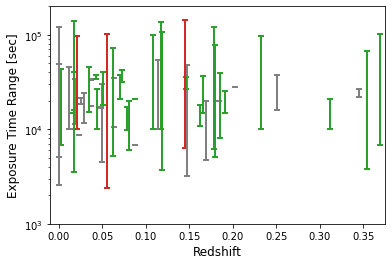

In [28]:
# toggle saving of file
# file_save = True
file_save = False

fig, ax = plt.subplots(
                       # figsize=(12,8)
                      )


# plot_z_vs_exp_t(tde_cat
#                , linewidth=4 
#                )

# plot_z_vs_exp_t(priority_tdes_df, colors[2]
#                 # , linestyle='dotted'
#                 , linewidth=4 )
    
# plot_z_vs_exp_t(fitted_df, colors[3]
#                , linewidth=4
#                )

plot_z_vs_exp_t(tde_cat, color='grey'
               # , linewidth=4 
               )

plot_z_vs_exp_t(priority_tdes_df, colors[2]
                # , linestyle='dotted'
                # , linewidth=4 
               )
    
plot_z_vs_exp_t(fitted_df, colors[3]
               # , linewidth=4
               )

# print(fitted_df.Name.iloc[0], '\n', min(get_exp_times(pd.DataFrame(fitted_xray_df.iloc[0].to_numpy().flatten()).dropna())))

# plt.plot([0.01*i for i in range(40)], f([0.01*i for i in range(40)])
#           , ls='-.', c='k')

# plt.plot([0.01*i for i in range(40)], g([0.01*i for i in range(40)])
#           , ls='-.', c='grey')

# plt.plot([0.01*i for i in range(40)], quadratic_curve_fitted([0.01*i for i in range(40)])
#         , ls='-', c='k'
#         )

# ax.set_title('Exposure Time Range Vs Redshift')

ax.set_xlabel(f'Redshift', fontsize=12
              # , fontweight='bold'
             )
ax.set_ylabel('Exposure Time Range [sec]', fontsize=12
              # , fontweight='bold'
             )
# ax.tick_params(size=10)


# ax.grid(axis='y')
# ax.set_facecolor('#d8dcd6')
ax.set_xlim(-0.01,0.375)
# ax.set_xlim(0,0.02)
ax.set_ylim(1000,2e5)
ax.set_xticks([0.05*i for i in range(8)], fontsize=14)
ax.set_yticks([1000*(10**i) for i in range(3)], fontsize=14)

# ax.set_xscale('log')
ax.set_yscale('log')

# plt.fill_between([0.01*i for i in range(40)], quadratic_curve_fitted([0.01*i for i in range(40)])
#                 , y2=0, where=None, interpolate=False, step=None, data=None, color='pink')

# plt.text(0.4,20
#          , fr'$\mu={round(z_mean,3)},\; \sigma={round(z_std,3)},\; \sigma^2={round(z_var,3)}$'
#         )

# fitted_str = '\n'.join(str(e) for e in list(fitted_df[['Name','z']].to_numpy().flatten()))
# print(fitted_str)

# plt.text(0.2,2.5e3
#          , f'{fitted_str}'
#         )

# plt.axvline(z_mean, color='k', linestyle='dotted', linewidth=4)

# plt.axvline(z_mean+z_std, color='k', linestyle='dotted', linewidth=2)
# plt.axvline(z_mean-z_std, color='k', linestyle='dotted', linewidth=2)
# plt.axvline(z_mean+2*z_std, color='k', linestyle='dotted', linewidth=2)
# plt.axvline(z_mean+3*z_std, color='k', linestyle='dotted', linewidth=2)

# for z in tde_cat.z.iloc[[3,5,7,9]]:
#     plt.axvline(z, color='k', linestyle='dotted', linewidth=2)

# plt.show()

if file_save == True:
    plt.savefig('tde_exp_times_vs_redshift.pdf', format='pdf')

In [29]:
# Code for getting colors from matplotlib default color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

def subplot_z_vs_exp_t(df, color=colors[0], linestyle='solid', linewidth=2):
    
    for index, row in df.iterrows():
        # print(row['z'])
        # print(row[['All XMM Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec])'
        #                      , 'All Chandra Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec], detector)'
        #                     ]
        #                    ])

        exp_t_df = row[['All XMM Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec])'
                             , 'All Chandra Data (#obs: ObsIDs, exp date [yyyy-mm-dd], exp dur [sec], detector)'
                            ]
                           ]

        z = row['z']

        exp_t_df = pd.DataFrame( exp_t_df.to_numpy().flatten() ).dropna() 

        exp_times = get_exp_times(exp_t_df)
        # print(exp_times)

        zs = [z]*len(exp_times)
        # print(zs)
        
        ax.plot(zs, exp_times, c=color, linestyle=linestyle, linewidth=linewidth)
        # plt.scatter(zs, exp_times, c=color, linestyle=linestyle, linewidth=linewidth)
        
        # Plotting ticks for median values for each exp time range
        # plt.scatter(z, np.median(exp_times), marker='+'
        #             , c=color, linestyle=linestyle, linewidth=linewidth)
        
        # Plotting ticks for extrema for each exp time range
        if exp_times != []:
            # print(np.amax(exp_times), np.amin(exp_times))
            ax.scatter(z, np.amax(exp_times), marker='_'
                        , c=color, linestyle=linestyle, linewidth=linewidth
                       )
            ax.scatter(z, np.amin(exp_times), marker='_'
                        , c=color, linestyle=linestyle, linewidth=linewidth
                       )

        # print('\n')
        # break


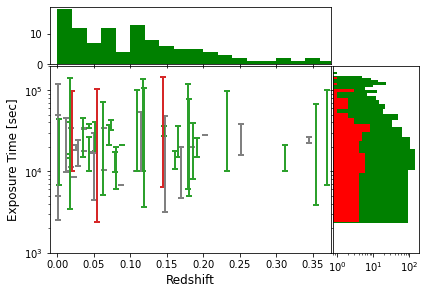

In [30]:
# fig, ax = plt.subplots(
#                        # figsize=(12,8)
#                       )

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_plot = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure()

ax = fig.add_axes(rect_plot)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# no labels
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# now determine nice limits by hand:

x = tde_cat.z
y = all_exp_times
y2 = fitted_exp_times

binwidth = 0.4/20
xmax = max(x)
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
# print(xmax,xymax)
# lim = (int(xymax/binwidth) + 1) * binwidth
lim = (int(xmax/binwidth) + 1) * binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins, color='g')
ax_histy.hist(y, bins=20, color='g', orientation='horizontal')
ax_histy.hist(y2, bins=20, color='r', orientation='horizontal')

ax_histy.set_xscale('log')


# plot_z_vs_exp_t(tde_cat
#                , linewidth=4 
#                )

# plot_z_vs_exp_t(priority_tdes_df, colors[2]
#                 # , linestyle='dotted'
#                 , linewidth=4 )
    
# plot_z_vs_exp_t(fitted_df, colors[3]
#                , linewidth=4
#                )

subplot_z_vs_exp_t(tde_cat, color='grey'
               # , linewidth=4 
               )

subplot_z_vs_exp_t(priority_tdes_df, colors[2]
                # , linestyle='dotted'
                # , linewidth=4 
               )
    
subplot_z_vs_exp_t(fitted_df, colors[3]
               # , linewidth=4
               )

# print(fitted_df.Name.iloc[0], '\n', min(get_exp_times(pd.DataFrame(fitted_xray_df.iloc[0].to_numpy().flatten()).dropna())))

# plt.plot([0.01*i for i in range(40)], f([0.01*i for i in range(40)])
#           , ls='-.', c='k')

# plt.plot([0.01*i for i in range(40)], g([0.01*i for i in range(40)])
#           , ls='-.', c='grey')

# plt.plot([0.01*i for i in range(40)], quadratic_curve_fitted([0.01*i for i in range(40)])
#         , ls='-', c='k'
#         )

ax.set_xlabel(f'Redshift', fontsize=12
              # , fontweight='bold'
             )
ax.set_ylabel('Exposure Time [sec]', fontsize=12
              # , fontweight='bold'
             )
# ax.tick_params(size=10)


# ax.grid(axis='y')
# ax.set_facecolor('#d8dcd6')
ax.set_xlim(-0.01,0.375)
# ax.set_xlim(0,0.02)
ax.set_ylim(1000,2e5)
ax.set_xticks([0.05*i for i in range(8)], fontsize=14)
ax.set_yticks([1000*(10**i) for i in range(3)], fontsize=14)

# ax.set_xscale('log')
ax.set_yscale('log')

# plt.fill_between([0.01*i for i in range(40)], quadratic_curve_fitted([0.01*i for i in range(40)])
#                 , y2=0, where=None, interpolate=False, step=None, data=None, color='pink')

# plt.text(0.4,20
#          , fr'$\mu={round(z_mean,3)},\; \sigma={round(z_std,3)},\; \sigma^2={round(z_var,3)}$'
#         )

# fitted_str = '\n'.join(str(e) for e in list(fitted_df[['Name','z']].to_numpy().flatten()))
# print(fitted_str)

# plt.text(0.2,2.5e3
#          , f'{fitted_str}'
#         )

# plt.axvline(z_mean, color='k', linestyle='dotted', linewidth=4)

# plt.axvline(z_mean+z_std, color='k', linestyle='dotted', linewidth=2)
# plt.axvline(z_mean-z_std, color='k', linestyle='dotted', linewidth=2)
# plt.axvline(z_mean+2*z_std, color='k', linestyle='dotted', linewidth=2)
# plt.axvline(z_mean+3*z_std, color='k', linestyle='dotted', linewidth=2)

# for z in tde_cat.z.iloc[[3,5,7,9]]:
#     plt.axvline(z, color='k', linestyle='dotted', linewidth=2)

# plt.show()

# if file_save == True:
#     plt.savefig('tde_exp_times_vs_redshift_with_hist')

In [31]:
len(all_exp_times)

648

In [32]:
len(fitted_exp_times)

46

In [33]:
len(all_exp_times)**(1/3) * 2

17.306994843688898

In [34]:
len(fitted_exp_times)**(1/3) * 2

7.166095742031892

In [35]:
3.49 * tde_cat.z.std() * tde_cat.z.count() ** (-1/3)

0.18359647605056506

In [36]:
bin_width = 0.00003 * 3
bin_width

9e-05

In [37]:
tde_cat.z.var()

0.06506504420381624

In [38]:
tde_cat.z.describe()

count    114.000000
mean       0.158196
std        0.255079
min        0.000271
25%        0.036600
50%        0.107550
75%        0.183000
max        2.230000
Name: z, dtype: float64

In [39]:
z_std = tde_cat.z.std()
z_var = tde_cat.z.var()
z_mean = tde_cat.z.mean()

print(f"{z_var}, {z_std}, {z_std**2}")

0.06506504420381624, 0.2550785059620199, 0.06506504420381623


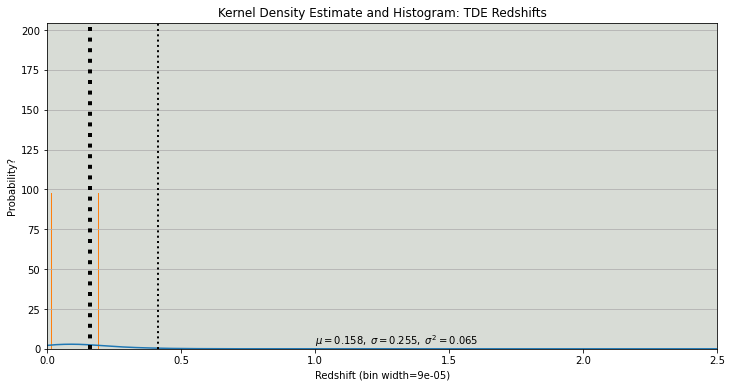

In [40]:
fig, ax = plt.subplots()

tde_cat.z.plot.kde(ax=ax
                   , legend=False
                   , title='Kernel Density Estimate and Histogram: TDE Redshifts'
                  )
tde_cat.z.plot.hist(density=True, ax=ax
                    , bins=np.arange(0,2.5,bin_width)
                    , figsize=(12,6)
                   )

ax.set_xlabel(f'Redshift (bin width={bin_width})')
ax.set_ylabel('Probability?')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')
ax.set_xlim(0,2.5)

plt.text(1, 2.5
         , fr'$\mu={round(z_mean,3)},\; \sigma={round(z_std,3)},\; \sigma^2={round(z_var,3)}$'
        )

plt.axvline(z_mean, color='k', linestyle='dotted', linewidth=4)

plt.axvline(z_mean+z_std, color='k', linestyle='dotted', linewidth=2)
plt.axvline(z_mean-z_std, color='k', linestyle='dotted', linewidth=2)
# plt.axvline(z_mean+2*z_std, color='k', linestyle='dotted', linewidth=2)
# plt.axvline(z_mean+3*z_std, color='k', linestyle='dotted', linewidth=2)

plt.show()

# if file_save == True:
#     plt.savefig('tde_redshift_hist')

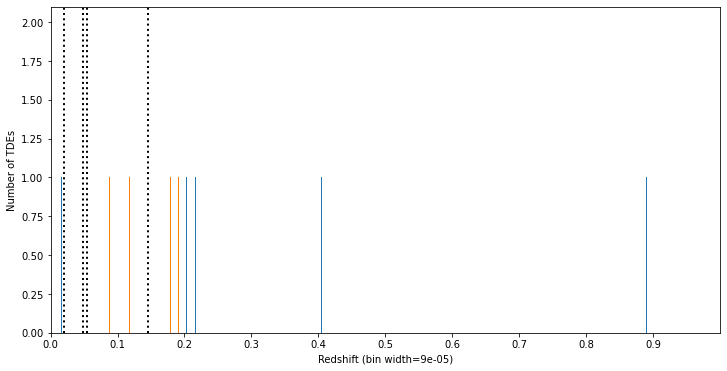

In [41]:
fig, ax = plt.subplots()

# tde_cat.z.plot.kde(ax=ax
#                    , legend=False
#                    , title='Kernel Density Estimate and Histogram: TDE Redshifts'
#                    , sharey=False
#                   )

tde_cat.z.plot.hist(density=False, ax=ax
                    , bins=np.arange(0,2.5,bin_width)
                    , figsize=(12,6)
                    , sharey=False
                   )

tde_cat.iloc[priority_tdes].z.plot.hist(density=False, ax=ax
                    , bins=np.arange(0,2.5,bin_width)
                    , figsize=(12,6)
                    , sharey=False
                   )

ax.set_xlabel(f'Redshift (bin width={bin_width})')
ax.set_ylabel('Number of TDEs')
# ax.grid(axis='y')
# ax.set_facecolor('#d8dcd6')
ax.set_xlim(0,1)
ax.set_xticks([0.1*i for i in range(10)])

# plt.text(0.4,20
#          , fr'$\mu={round(z_mean,3)},\; \sigma={round(z_std,3)},\; \sigma^2={round(z_var,3)}$'
#         )

# plt.axvline(z_mean, color='k', linestyle='dotted', linewidth=4)

# plt.axvline(z_mean+z_std, color='k', linestyle='dotted', linewidth=2)
# plt.axvline(z_mean-z_std, color='k', linestyle='dotted', linewidth=2)
# plt.axvline(z_mean+2*z_std, color='k', linestyle='dotted', linewidth=2)
# plt.axvline(z_mean+3*z_std, color='k', linestyle='dotted', linewidth=2)

for z in tde_cat.z.iloc[[3,5,7,9]]:
    plt.axvline(z, color='k', linestyle='dotted', linewidth=2)

plt.show()

# if file_save == True:
#     plt.savefig('tde_redshift_hist')